This code was ran in this configuration: 
* Jupyter Lab version -> 4.0.5 
* Python version -> 3.11.5

# Importing Libraries 

In [293]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from IPython.display import display

# Part (a)

Make a grid-style (pairwise) plot of the raw multivariate data. This visualization should be
as explained in the routine pairplot at https://seaborn.pydata.org/generated/seaborn.pairplot.html for Python and plotmatrix at https://www.mathworks.com/help/matlab/ref/plotmatrix.html for MatLab.

In [295]:


# Openening and reading the cars-fixed04.dat files
file_data = None
with open('cars-fixed04.dat', 'r') as file:
    file_data = file.readlines()

data = [line.strip().split(',') for line in file_data]


### converting them to dataframes ###

# selecting model of the cars for data frame's indices
indices = [data[i][0] for i in range(1, len(data))]
# selecting features title for data frame's columns
columns = data[0]
# removing first entry of each car list which is the model of the car
data = [data[i][1:] for i in range(1, len(data))]
# removing empty data which is none
data.pop(196)
indices.pop(196)

df = pd.DataFrame(data, index = indices, columns=columns)


# adjusting the types of data from strings to bool and float
df[df.columns[:7]] = df[df.columns[:7]].astype(int).astype(bool)
df[df.columns[7:]] = df[df.columns[7:]].astype(float)

print('Data frame corresponding to the cars-fixed04.dat file: \n')
pd.set_option('display.max_rows', 12)
display(df)

Data frame corresponding to the cars-fixed04.dat file: 



,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,False,False,False,False,False,False,False,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,72.0
Acura 3.5 RL Navigation,False,False,False,False,False,False,False,46100.0,41100.0,3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0,72.0
Acura MDX,False,True,False,False,False,True,False,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,77.0
Acura NSX S,True,False,False,False,False,False,True,89765.0,79978.0,3.2,6.0,290.0,17.0,24.0,3153.0,100.0,174.0,71.0
Acura RSX,False,False,False,False,False,False,False,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,False,False,False,False,False,False,False,37730.0,35542.0,2.9,6.0,208.0,20.0,28.0,3576.0,110.0,190.0,72.0
Volvo S80 T6,False,False,False,False,False,False,False,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,72.0
Volvo V40,False,False,True,False,False,False,False,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0,68.0
Volvo XC70,False,False,True,False,False,True,False,35145.0,33112.0,2.5,5.0,208.0,20.0,27.0,3823.0,109.0,186.0,73.0


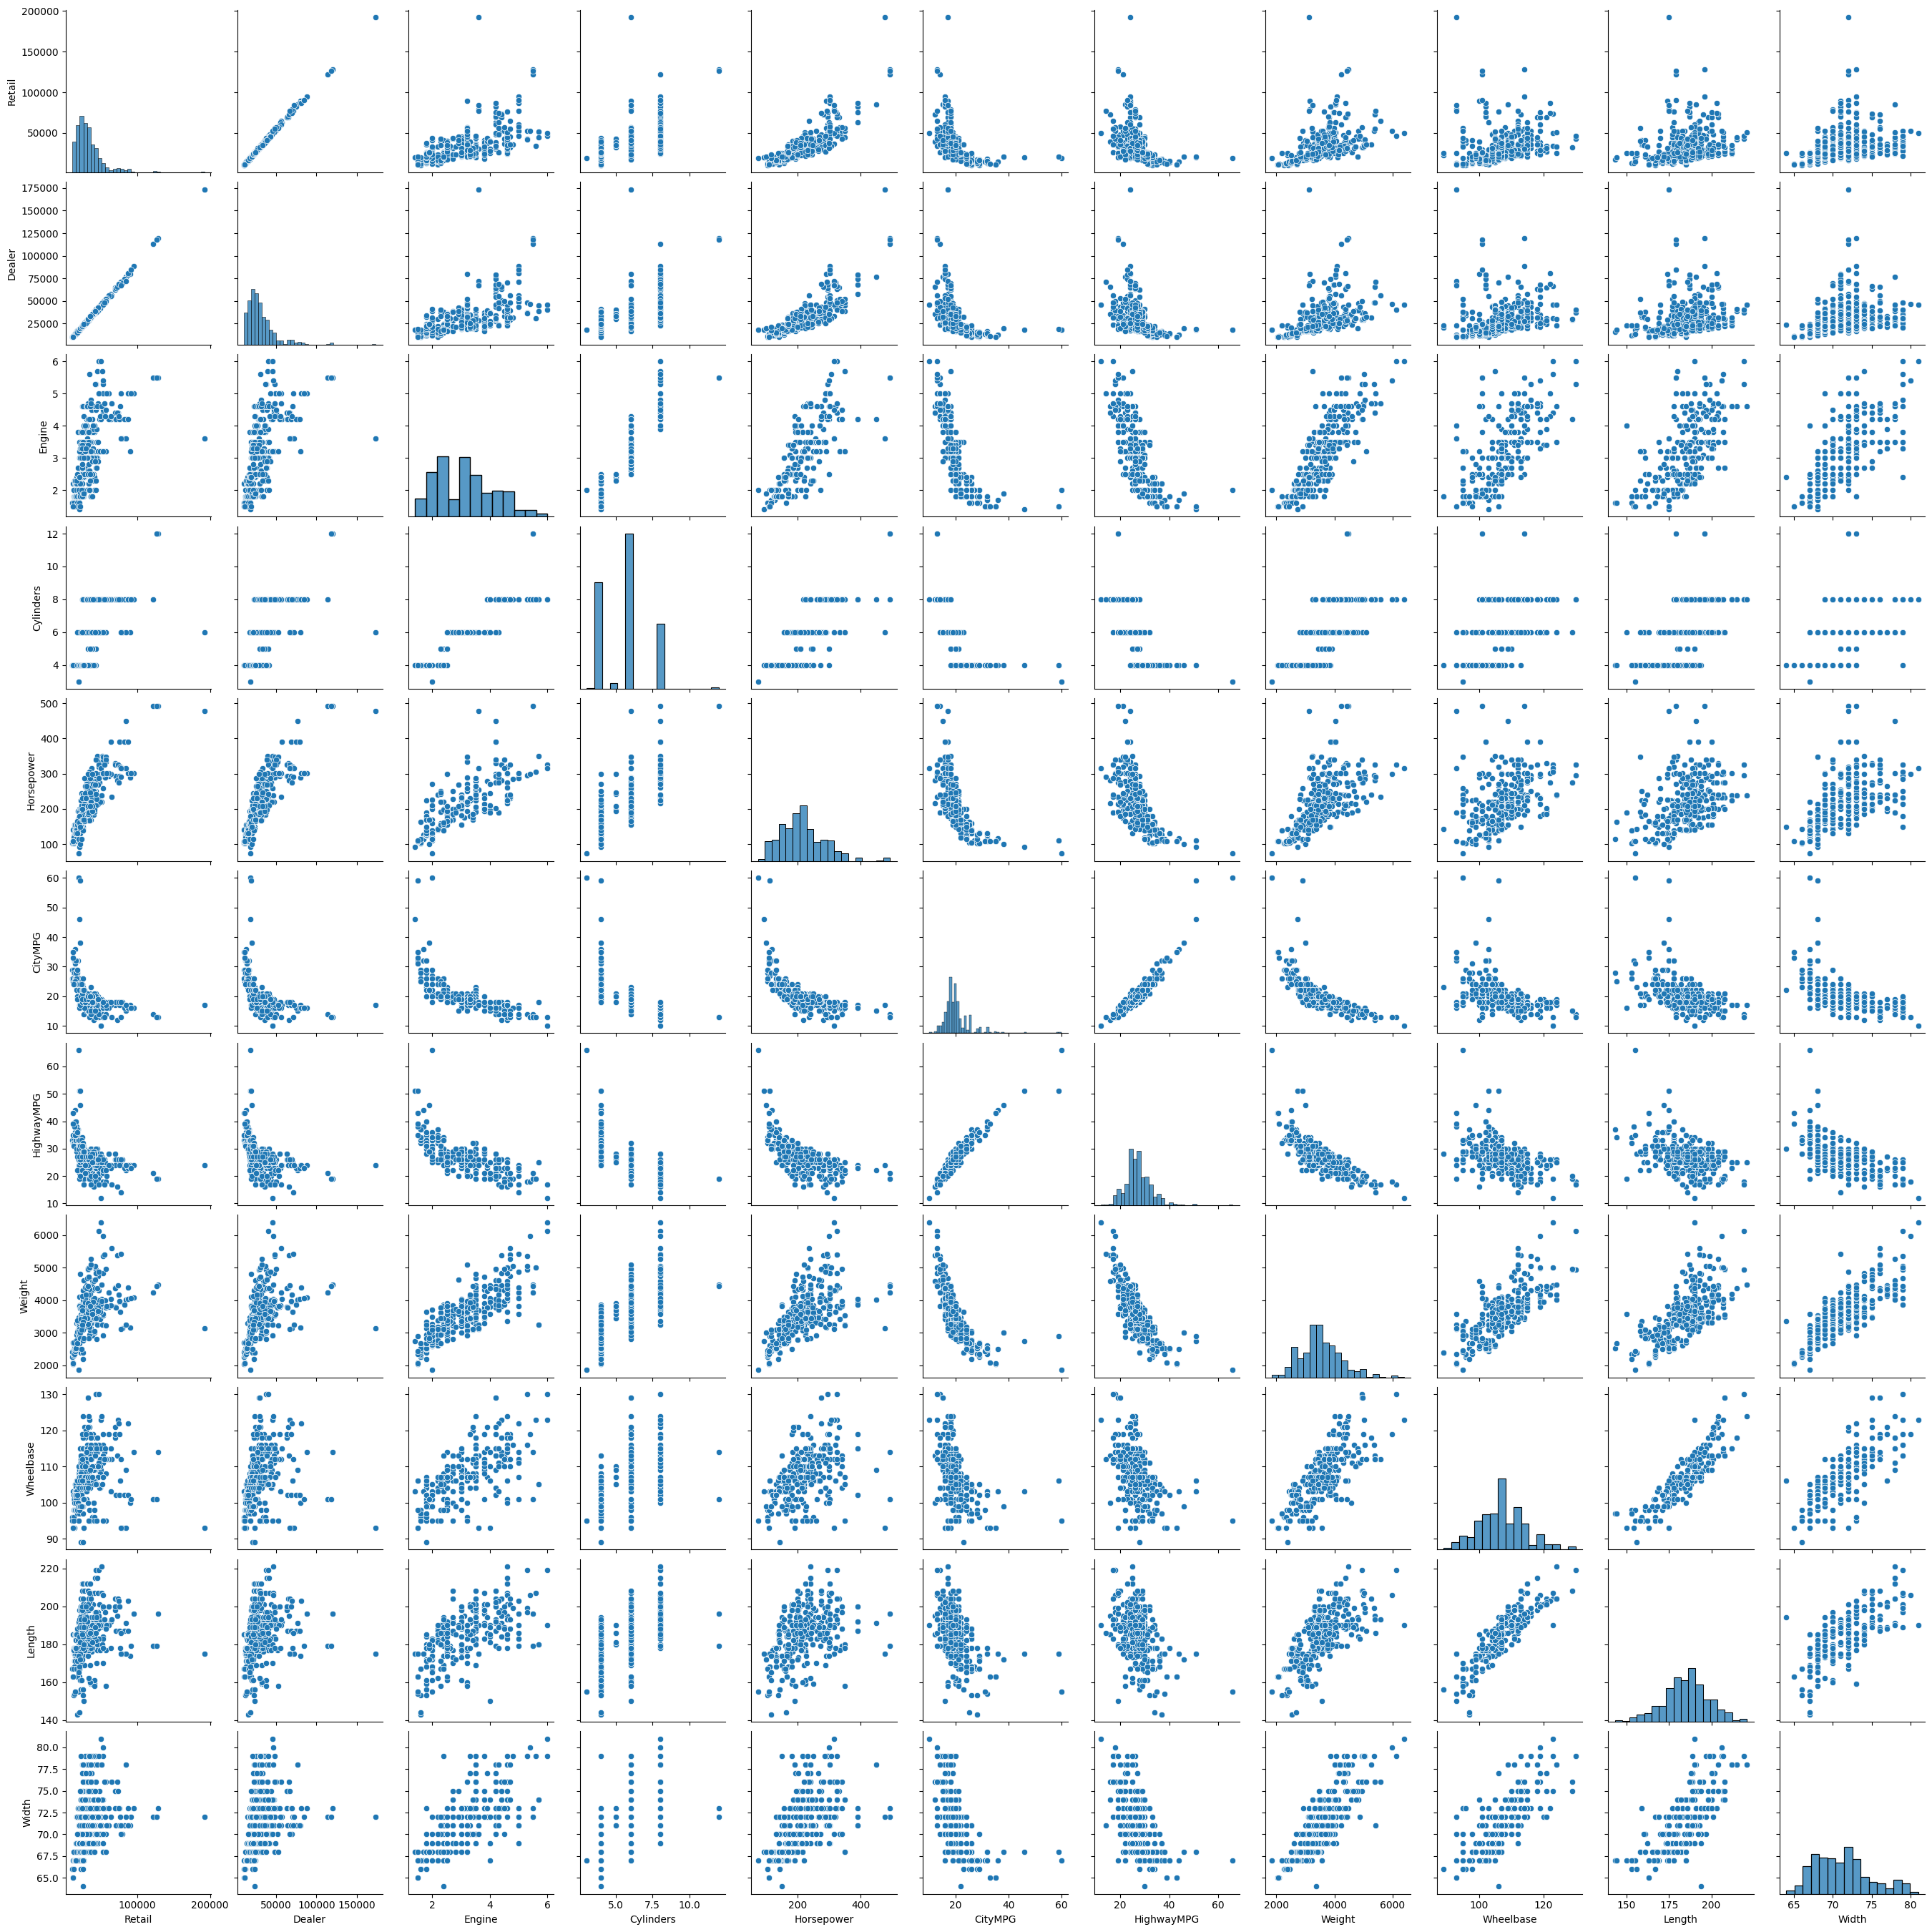

In [296]:

# plotting the pair plot of different features
cols_to_plot = df.columns[7:]
sns.pairplot(df[cols_to_plot], corner=False)
plt.show()

# Part (b)

Make a covariance heatmap plot as illustrated at https://seaborn.pydata.org/generated/seaborn.heatmap.html for Python and at https://www.mathworks.com/help/matlab/ref/heatmap.html heatmap chart for MatLab.

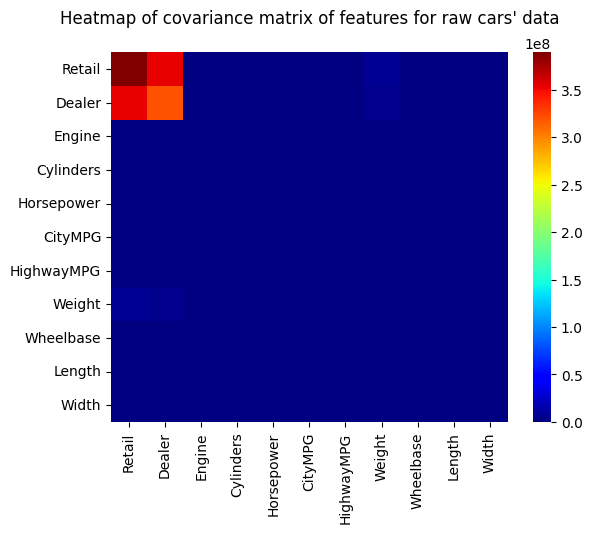

In [400]:
sns.heatmap(df[cols_to_plot].cov(), annot=False, fmt='.2f', cmap='jet')
plt.title('Heatmap of covariance matrix of features for raw cars\' data\n')
plt.show()

As you can see, without any scaling, as the features vary in different scales, the covariances are not comparable and doesn't make sense to plot them together. So we need to scale the data by shifting each feature to make the mean of it zero and scaling it to make the variance 1. At the end, these steps are actually equivalent to plotting the correaltion coefficients heatmap! 

## Heatmap of correlation coefficients matrix

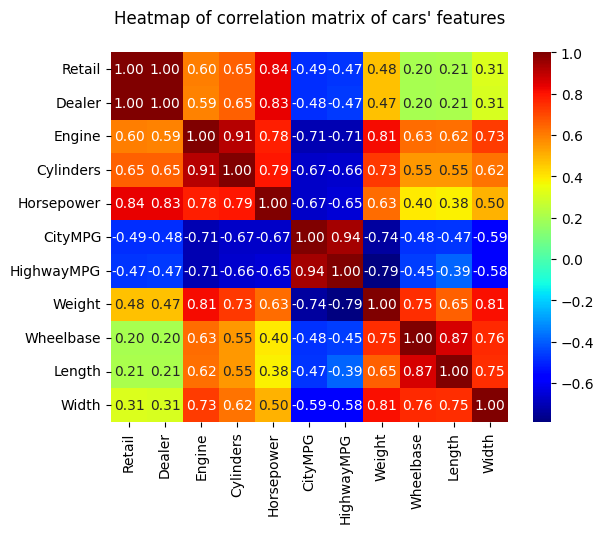

In [401]:
sns.heatmap(df[cols_to_plot].corr(), annot=True, fmt='.2f', cmap='jet')
plt.title('Heatmap of correlation matrix of cars\' features\n')
plt.show()

## Heat map of scaled data (Standard scaling)

In [402]:
# Scaling data using StandardScaler class from sklearn.preproccesing 
scaled_data = StandardScaler().fit_transform(np.array(df)[:, 7:])
scaled_df = pd.DataFrame(data = scaled_data, columns=df.columns[7:], index= df.index)

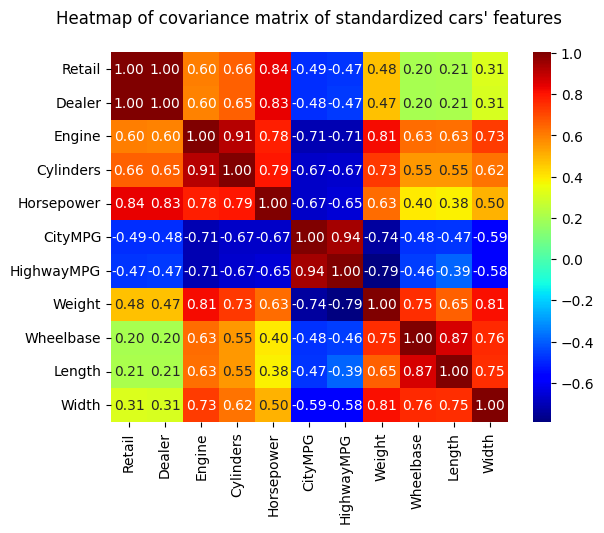

In [403]:
sns.heatmap(scaled_df.cov(), annot=True, fmt='.2f', cmap='jet')
plt.title('Heatmap of covariance matrix of standardized cars\' features\n')
plt.show()

# Part (c)

Apply PCA onto the data and check if you can reproduce the components’ results of Cosma.
Make a Scree plot to decide on how many principal components are needed to explain at least
80% of the data.

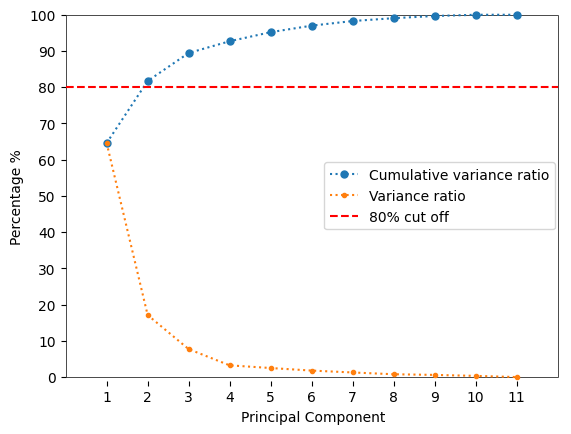

In [382]:

# performing pca on the scaled dataframe and storing the data in new coordinate in x_new for next part of the question
pca = PCA()
x_new = pca.fit_transform(np.array(scaled_df))

### plotting the explained variance ratio anc cumulative of that versus principal components ###
fig = plt.figure()
ax = fig.add_axes(111)
ax.set_aspect('auto')

# creating a manual box for plot to fit inside of it 
ax.vlines(x = [-1, 11], ymin = [0, 0], ymax=[100, 100], color='k', linestyles='-', linewidth = 0.5) 
ax.hlines(y = [0, 100], xmin = [-1, -1], xmax=[11, 11], color='k', linestyles='-', linewidth = 0.5)

# plotting cumulative and non cumulative curve of variance ratios
ax.plot(pca.explained_variance_ratio_.cumsum() * 100, linestyle = ':', marker = 'o', label='Cumulative variance ratio', markersize = 5)
ax.plot(pca.explained_variance_ratio_ * 100, linestyle = ':', marker = 'o', label='Variance ratio', markersize = 3)


# adjusting the configuration of the figure
ax.set_xlabel('Principal Component')
ax.set_ylabel('Percentage %')
ax.set_xticks(np.arange(11), np.arange(11) + 1)
ax.set_yticks(np.arange(0, 110, 10))
ax.hlines(xmin=-1, xmax=11, y=80, colors='r', linestyles='--', label='80% cut off')
ax.spines[:].set_visible(False)
ax.legend(loc = 'best')
plt.xlim([-1, 11.1])
plt.ylim([-1,101])
plt.show()

We need at least two principal components to explain more than 80% variability of data! 

# Part (d)

Make a PCA plot (first principal component along the horizontal axis versus second principal
component along the vertical axis) with the transformed/projected data. How do you interpret
this plot

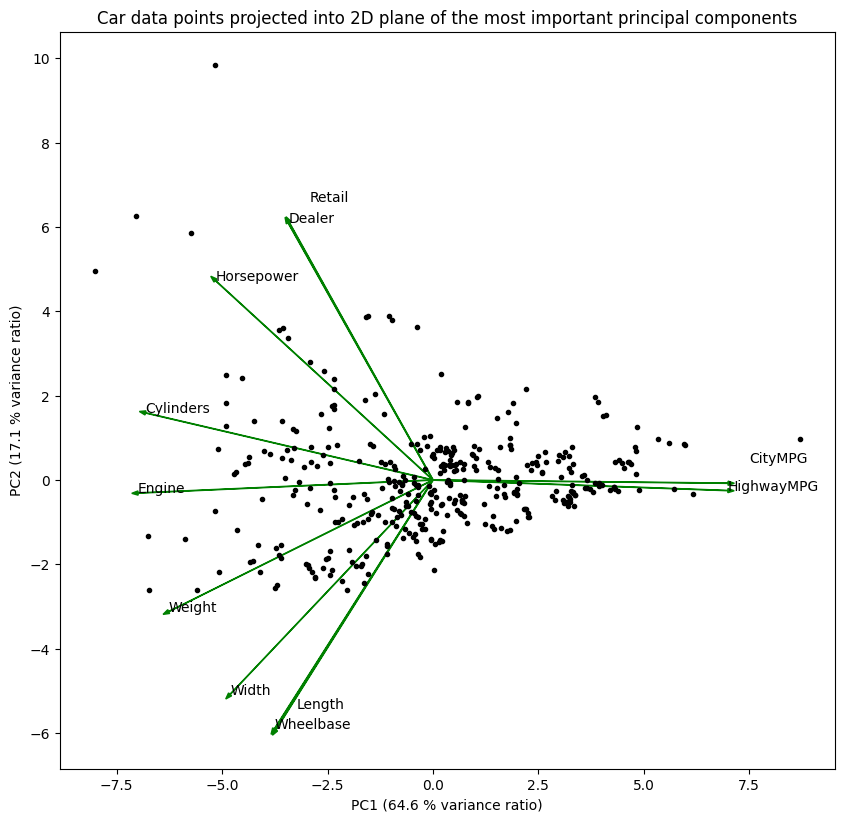

In [387]:
# creating the figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_aspect('equal')

# plotting the pc2 vs. pc1 of data points
ax.plot(x_new[:, 0], x_new[:, 1], marker = 'o', linestyle = '', color = 'k', markerfacecolor = 'k', markersize = 3)




# looping for different different features to plot arrow corresponding to the projection of that feature into PC1 and PC2 plane
for index, feature in enumerate(scaled_df.columns):
    
    # unit vector in the initial space pointing into the corresponding feature 
    feature_dir = [[float(index == i) for i in range(11)]]

    # feature's direction in new coordinates (PCA coordinates)
    tranformed_feature_dir =  pca.transform(feature_dir)[0]

    # selecting the 2 components of feature's direction and normalizng it for 2D visualization
    normalized_tranformed_feature_dir_2d = tranformed_feature_dir[:2]/np.linalg.norm(tranformed_feature_dir[:2])


    # amplifing the directions arrows' size and plotting them 
    amplifier = 7
    dx, dy = amplifier* normalized_tranformed_feature_dir_2d
    ax.arrow(x=0, y=0, dx=dx , dy = dy, width = 0.01, head_width = 0.1, color = 'g')

    # because some feutures have overlap, we need to change the position their labels
    if feature in ['Retail', 'Length', 'CityMPG']:
        dx = dx + 0.5
        dy = dy + 0.5

    # plotting feuture label
    plt.text(x= dx , y= dy, s=feature)


# Adjusting figure labels and title
ax.set_title('Car data points projected into 2D plane of the most important principal components')
ax.set_xlabel('PC1 (' + str(np.round(pca.explained_variance_ratio_[0]*100, 1)) + ' % variance ratio)')
ax.set_ylabel('PC2 (' + str(np.round(pca.explained_variance_ratio_[1]*100, 1)) + ' % variance ratio)')
plt.show()

By combining this figure with the previous parts, I interpret that city and highway millage of the cars have negetive correlation (opposite relation) with other featurs. 